Summary Statistics:
       Answer Value
count  11697.000000
mean   63989.638320
std     6365.236973
min    54199.730000
25%    58661.630000
50%    63180.570000
75%    68750.490000
max    76646.430000

Missing Values:
Equipment SNO    0
Asset Number     0
Reading Name     0
Answer Value     0
Timestamp        0
Is Error Set?    0
Asset            0
Company          0
dtype: int64


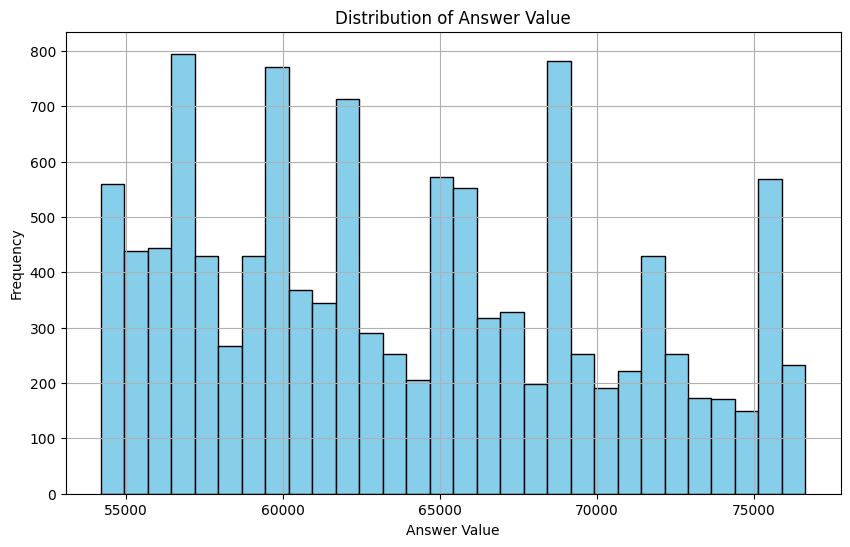

/var/folders/bp/6nr_cvms0_x4_qdd1ntdd17c0000gn/T/ipykernel_85730/3230085325.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


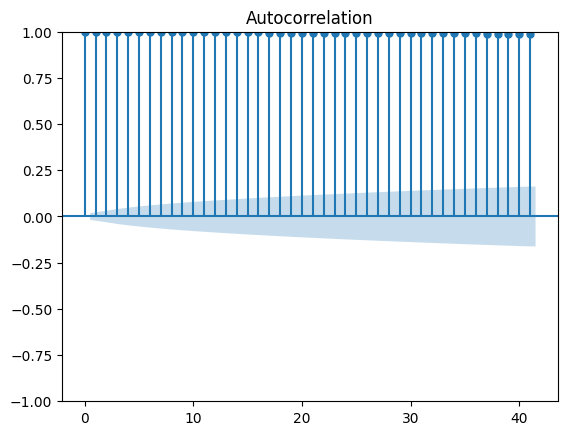

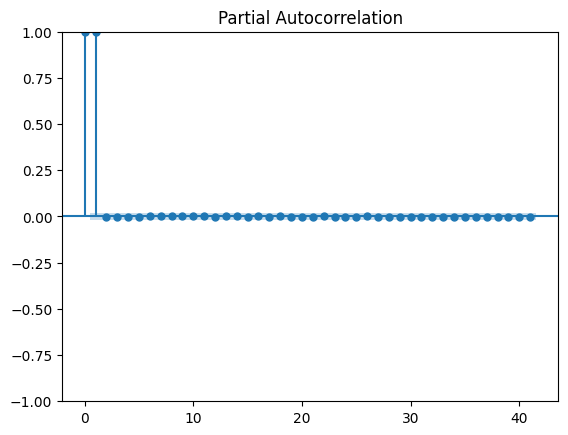


Forecasted Values for the Next 30 Time Periods:
                 Timestamp  Forecasted Value
11697 2024-12-03 00:45:00      54199.731464
11698 2024-12-03 01:45:00      54199.732884
11699 2024-12-03 02:45:00      54199.734303
11700 2024-12-03 03:45:00      54199.735722
11701 2024-12-03 04:45:00      54199.737141
11702 2024-12-03 05:45:00      54199.738560
11703 2024-12-03 06:45:00      54199.739980
11704 2024-12-03 07:45:00      54199.741399
11705 2024-12-03 08:45:00      54199.742818
11706 2024-12-03 09:45:00      54199.744237
11707 2024-12-03 10:45:00      54199.745656
11708 2024-12-03 11:45:00      54199.747076
11709 2024-12-03 12:45:00      54199.748495
11710 2024-12-03 13:45:00      54199.749914
11711 2024-12-03 14:45:00      54199.751333
11712 2024-12-03 15:45:00      54199.752752
11713 2024-12-03 16:45:00      54199.754172
11714 2024-12-03 17:45:00      54199.755591
11715 2024-12-03 18:45:00      54199.757010
11716 2024-12-03 19:45:00      54199.758429
11717 2024-12-03 20:45:00 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_csv('data.csv')

# Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
# Distribution of target variable
plt.figure(figsize=(10, 6))
plt.hist(df['Answer Value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Answer Value')
plt.xlabel('Answer Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Outlier detection and treatment (if necessary)
# For simplicity, assuming outliers are already handled

# Data Transformation
# Transform timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Feature engineering
# Extracting hour and day of week from timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Data Normalization
# Min-Max normalization of the target variable
min_val = df['Answer Value'].min()
max_val = df['Answer Value'].max()
df['Normalized Value'] = (df['Answer Value'] - min_val) / (max_val - min_val)

# ARIMA Model Training
# Model Selection (using ACF and PACF plots)
plot_acf(df['Answer Value'])
plot_pacf(df['Answer Value'])
plt.show()

# Based on the ACF and PACF plots, determine the values of p and q for the ARIMA model
p = 1  # Autoregressive order
d = 0  # Degree of differencing
q = 1  # Moving average order

# Model Training
model = ARIMA(df['Answer Value'], order=(p, d, q))
arima_model = model.fit()

# Forecasting
forecast_horizon = 30  # Forecasting for the next 30 time periods
forecast = arima_model.forecast(steps=forecast_horizon)

# Print forecasted values
future_dates = pd.date_range(start=df['Timestamp'].max(), periods=forecast_horizon + 1, freq='H')[1:]
forecast_df = pd.DataFrame({'Timestamp': future_dates, 'Forecasted Value': forecast})
print("\nForecasted Values for the Next 30 Time Periods:\n", forecast_df)


In [12]:
# Determine the forecast horizon
forecast_horizon = 30  # For example, forecasting for the next 30 days

# Generate future timestamps
start_date = pd.to_datetime('2024-02-20')
future_dates = pd.date_range(start=start_date, periods=forecast_horizon, freq='D')

# Use the trained ARIMA model to make forecasts
forecast = arima_model.forecast(steps=forecast_horizon)

# Create a DataFrame to store the forecasted values along with timestamps
forecast_df = pd.DataFrame({'Timestamp': future_dates, 'Forecasted Value': forecast})

# Print the forecasted values
print("\nForecasted Values for the Period after 20-02-2024:\n", forecast_df)



Forecasted Values for the Period after 20-02-2024:
        Timestamp  Forecasted Value
11697 2024-02-20      54199.731464
11698 2024-02-21      54199.732884
11699 2024-02-22      54199.734303
11700 2024-02-23      54199.735722
11701 2024-02-24      54199.737141
11702 2024-02-25      54199.738560
11703 2024-02-26      54199.739980
11704 2024-02-27      54199.741399
11705 2024-02-28      54199.742818
11706 2024-02-29      54199.744237
11707 2024-03-01      54199.745656
11708 2024-03-02      54199.747076
11709 2024-03-03      54199.748495
11710 2024-03-04      54199.749914
11711 2024-03-05      54199.751333
11712 2024-03-06      54199.752752
11713 2024-03-07      54199.754172
11714 2024-03-08      54199.755591
11715 2024-03-09      54199.757010
11716 2024-03-10      54199.758429
11717 2024-03-11      54199.759849
11718 2024-03-12      54199.761268
11719 2024-03-13      54199.762687
11720 2024-03-14      54199.764106
11721 2024-03-15      54199.765525
11722 2024-03-16      54199.766945
11